# Esercitazione 9 - The traveling salesman problem

Il problema del commesso viaggiatore consiste nel determinare il percorso ottimale per un venditore che deve visitare un insieme di $N$ città. Ogni città ha una posizione nello spazio rappresentata da un vettore $\vec{x}_i$. Il venditore deve:

- partire da una città (ad esempio la città natale),
- visitare tutte le città una sola volta,
- tornare alla città di partenza.

L’obiettivo è minimizzare la lunghezza totale del percorso.

Matematicamente si traduce nel trovare la permutazione di coordinate $\vec{x}_{P_i}$, ..., $\vec{x}_{P_N}$ che minimizzi la funzione costo:
$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2.
$$

Si sono prese in esame due configurazioni: la prima in cui $G=34$ città sono disposte lungo una circonferenza, la seconda in cui le città sono disposte dentro ad un quadrato in maniera casuale.

Il problema è stato affrontato con un algoritmo genetico, il quale consiste nel predisporre diverse sequenze (città visitate in un certo ordine) chiamate **cromosomi** composte da un numero di **geni** pari al numero di città da visitare più 1 (essendo che la sequenza deve concludersi con la prima città visitata). 
Per ciascuna sequenza è possibile calcolare la fitness corrisponende, che coincide con l'inverso della funzione costo scritta sopra, e quantifica quanto è buona tale sequenza a minimizzare il percorso totale.

Ad un certo passo dell'algoritmo si hanno ha disposizione un numero fisso di possibili sequenze (cromosomi, non necessariamente diversi) che costituiscono la popolazione attuale.

Al passo (*generazione*) successivo viene prodotta una nuova popolazione implementando alcune operazioni sulla popolazione del passo precedente che sono sostanzialmente di due tipi:
- **Crossover**: si selezionano due cromosomi "genitori" dalla popolazione attuale (dando maggior probabilità ai cromosomi migliori, aka con più fitness, di essere selezionati), si seleziona un punto di incrocio dove ciascuno dei due cromosomi viene "tagliato" e incrociato con l'altro. Questa operazione permette (scegliendo un punto di crossover variabile) di prendere delle sequenze che già funzionano bene e mischiarle insieme nella speranza di ottenere due sequenze figlie potenzialmente migliori dei genitori. Questo meccanismo è il responsabile del "fattore memoria" dell'algoritmo di ottimizzazione oltre che accellerare la convergenza.
- **Mutazione**: dopo che due cromosomi figli sono stati prodotti, si introducono delle mutazioni su di essi. Si tratta ovvero, di introdurre una qualche operazione che in maniera randomica introduca delle piccole variazioni casuali alle sequenze. Questo meccanismo è il responsabile del "fattore stocasticità" dell'algoritmo di ottimizzazione.
Sono stati scelti 4 possibili operatori di mutazione:

1)  permutazione a coppie di città (escludendo la prima città), ad esempio
    $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$

2)  spostamento di $+n$ posizioni per $m$ città contigue (escludendo la prima città e con $m < N-1$), ad esempio
    $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right]$
    per uno spostamento di $+2$ delle città seconda e terza.

3)  permutazione tra $m$ città contigue (escludendo la prima città) con altre (diverse!) $m$ città contigue ($m < N/2$), ad esempio
    $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right]$
    per una permutazione delle città seconda e terza con le ultime due.

4)  inversione dell’ordine di apparizione nel percorso di $m$ città (escludendo la prima città e con $m \le N$), ad esempio
    $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$
    per l’inversione delle città dalla 2 alla 4.


**Un corretto trade off tra memoria e stocasticità permette di realizzare un algoritmo che tenda ad un minimo perchè una certa generz, ma con la possibilità di uscire da minimi locali grazie alle mutazioni casuali**.

Per rendere effettiva questa affermazione si introducono due fattori: $P_m$ e $P_c$ che sono rispettivamente le probabilità che presi due cromosomi genitori venga eseguito un crossover e che venga eseguita una delle quattro mutazioni descritte sopra. Variando i valori di queste due probabilità si può aumentare e diminuire l'effetto memoria e la stocasticità.

Si è già citata l'operazione di selezione di due cromosomi genitori, in merito alla quale una scelta che risulta impattante sui risultati dell'algoritmo è quella dell'esponente inserito nell'operatore che effettua tale selezione. Avendo riordinato la popolazione per fitness decrescente, si può tramite esso scegliere con più o meno alta probabilità due cromosomi genitori con alta fitness. Rispetto ad estrarre uniformemente i cromosomi genitori dalla popolazione, si è dunque optato per un selettore con esponente $2$. In questo modo, si ha circa un $10\%$ di probabilità che venga selezionato il cromosoma con fitness migliore. Con esponente $3$ la probabilità sale a circa il $20\%$ e così via. Ci si può convincere di quanto appena affermato osservando il grafico che segue, mettendo un esponente maggiore di $1$ al generatore uniforme, **si converte il numero estratto da $x \to y$** e dunque verso valori sempre più prossimi a zero mano a mano che aumenta l'esponente (che si traduce nel selezionare sempre più spesso i primi individui della popolazione).

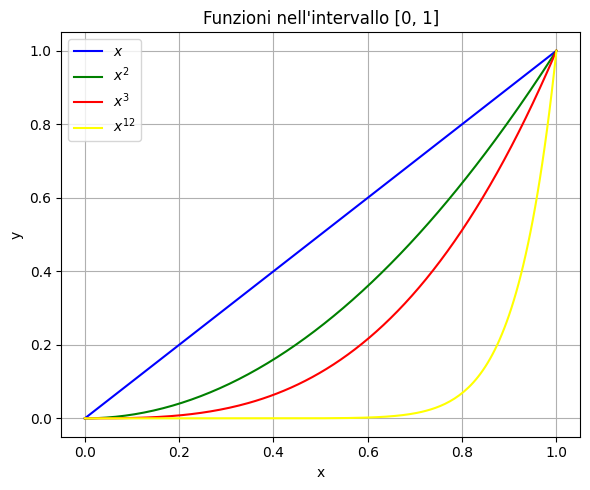

In [40]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 200)
y1 = x
y2 = x**2
y3 = x**3
y12 = x**12

plt.figure(figsize=(6, 5))
plt.plot(x, y1, label='$x$', color='blue')
plt.plot(x, y2, label=r'$x^2$', color='green')
plt.plot(x, y3, label=r'$x^3$', color='red')
plt.plot(x, y12, label=r'$x^{12}$', color='yellow')


plt.title("Funzioni nell'intervallo [0, 1]")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Si riportano di seguito i primi risultati ottenuti senza introdurre l'operatore di crossover (che verrà aggiunto in seguito). Affinchè l'algoritmo esplori in maniera efficace zone ampie dello spazio dei parametri anche senza crossover, si deve aumentare la probabilità che avvenga una mutazione. Si è scelto in questo caso una $P_m = 35 \%$ dopo aver testato valori superiori ed inferiori a questo e notato che i risultati peggiorano (convergenza verso una lunghezza del percorso maggiore). Allo stesso modo variando il numero di individui in una popolazione i risultati peggiorano, si è quindi impostato questo valore a $150$. 

**NB: in quel che segue, esclusivamente allo scopo di una migliore leggibilità (evitare numeri troppo grandi), i dati dei grafici sulle lunghezze sono riscalati, mentre quelli in cui viene raffigurato il percorso sono riportati con i valori originali di lato e raggio**

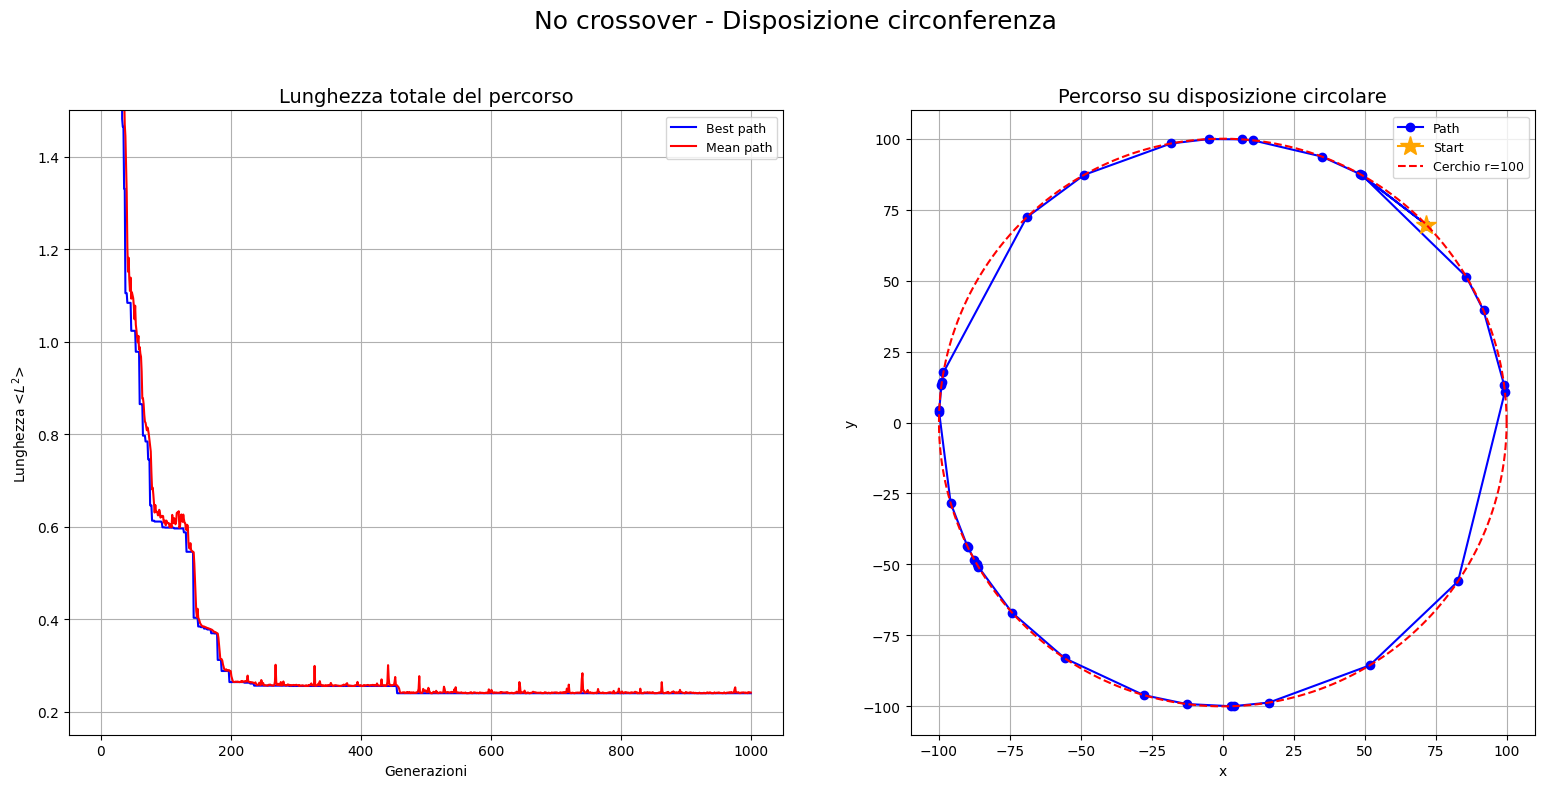

Sequenza coordinate:  

(71.75, 69.66) | (49.10, 87.12) | (85.75, 51.45) | (91.86, 39.51) | (99.12, 13.24) | (99.41, 10.85) | (82.88, -55.96) | (51.75, -85.57) | (16.29, -98.66) | (3.80, -99.93) | (2.92, -99.96) | (-12.75, -99.18) | (-27.88, -96.03) | (-55.68, -83.07) | (-74.25, -66.98) | (-86.10, -50.86) | (-86.65, -49.92) | (-87.49, -48.43) | (-89.82, -43.96) | (-89.99, -43.62) | (-95.88, -28.42) | (-99.94, 3.61) | (-99.91, 4.25) | (-99.14, 13.07) | (-98.97, 14.33) | (-98.43, 17.63) | (-69.14, 72.25) | (-48.82, 87.28) | (-18.26, 98.32) | (-4.96, 99.88) | (6.74, 99.77) | (10.56, 99.44) | (34.88, 93.72) | (48.22, 87.61) | (71.75, 69.66)

 Lunghezza del percorso migliore:  0.239725


In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Caricamento dati
b_lun, m_lun = np.loadtxt("Results/No_crossover/Lenght_0.35_0.00_Circle", unpack=True, skiprows=1, usecols=(1, 2))
gen = np.arange(1, b_lun.size + 1)
x_path, y_path = np.loadtxt("Results/No_crossover/Path_0.35_0.00_Circle", unpack=True, skiprows=1, usecols=(0, 1))

# Creazione dei subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.suptitle("No crossover - Disposizione circonferenza", size=18)

# Primo grafico: lunghezze
ax1.set_ylim(0.15, 1.5)
#ax1.set_aspect('equal')  # scala proporzionata
ax1.plot(gen, b_lun / 100000, color='blue', label="Best path")
ax1.plot(gen, m_lun / 100000, color='red', label="Mean path")
ax1.set_title("Lunghezza totale del percorso", fontsize=14)
ax1.set_xlabel("Generazioni")
ax1.set_ylabel(r'Lunghezza <$L^2$>')
ax1.legend(loc='upper right', prop={'size': 9})
ax1.grid(True)

# Secondo grafico: percorso e circonferenza
ax2.plot(x_path, y_path, color='blue', marker='o', linestyle='-', label='Path')  # percorso ordinato
# Evidenzia il punto di partenza
ax2.plot(x_path[0], y_path[0], marker='*', color='orange', markersize=15, label='Start')

# Aggiunta della circonferenza
theta = np.linspace(0, 2 * np.pi, 500)
raggio = 100
x_circ = raggio * np.cos(theta)
y_circ = raggio * np.sin(theta)
ax2.plot(x_circ, y_circ, 'r--', label='Cerchio r=100')  # cerchio tratteggiato rosso

# Settaggi grafico percorso
ax2.set_aspect('equal')  # scala proporzionata
ax2.set_title("Percorso su disposizione circolare", fontsize=14)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.grid(True)
ax2.legend(loc='upper right', prop={'size': 9})

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("Sequenza coordinate: ", "\n")

print(" | ".join(f"({x:.2f}, {y:.2f})" for x, y in zip(x_path, y_path)))

print("\n", "Lunghezza del percorso migliore: ", b_lun[-1]/100000)


I risultati prodotti evidenziano come per raggiungere una convergenza bastino all'incirca 450 generazioni, quanto trovato risulta soddisfacente pur non essendo il percorso ottimale (si noti infatti ad esempio che il terzo punto scelto dall'algoritmo non è la miglior scelta possibile). 
Si possono osservare risultati analoghi per il caso del quadrato:

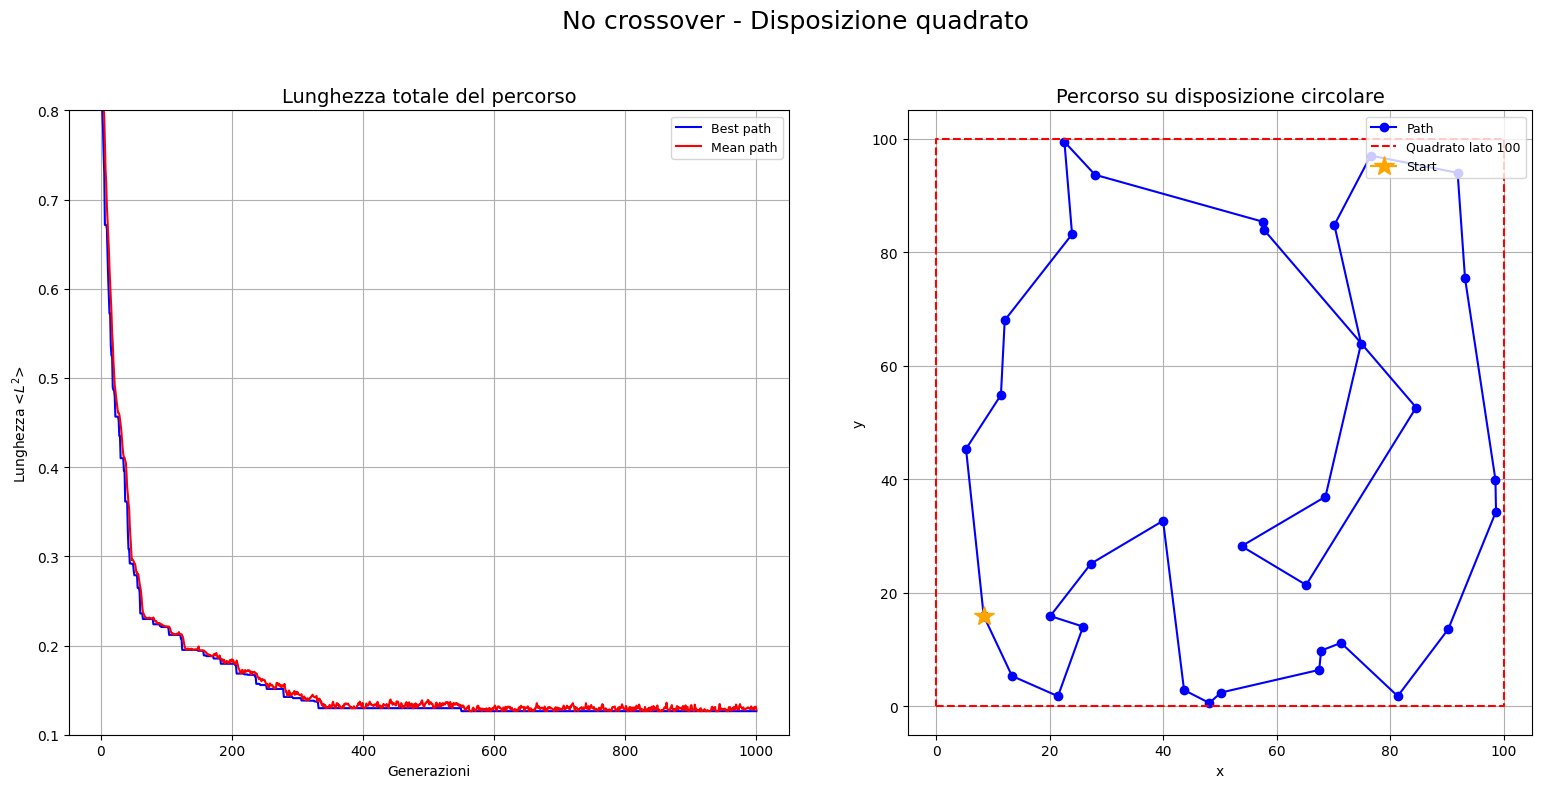

Sequenza coordinate:  

(8.40, 15.93) | (13.38, 5.35) | (21.47, 1.79) | (25.90, 14.05) | (20.12, 15.91) | (27.28, 25.14) | (39.99, 32.69) | (43.69, 2.87) | (48.15, 0.59) | (50.19, 2.43) | (67.49, 6.42) | (67.84, 9.82) | (71.34, 11.18) | (81.33, 1.79) | (90.23, 13.59) | (98.65, 34.32) | (98.55, 39.90) | (93.19, 75.41) | (91.89, 93.99) | (76.58, 97.03) | (70.17, 84.81) | (74.88, 63.91) | (68.60, 36.94) | (53.81, 28.22) | (65.20, 21.39) | (84.58, 52.65) | (57.73, 84.00) | (57.60, 85.37) | (27.99, 93.65) | (22.61, 99.46) | (23.96, 83.17) | (12.10, 68.01) | (11.43, 54.85) | (5.28, 45.35) | (8.40, 15.93)

 Lunghezza del percorso migliore:  0.1264


In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Caricamento dati
b_lun, m_lun = np.loadtxt("Results/No_crossover/Lenght_0.35_0.00_Square", unpack=True, skiprows=1, usecols=(1, 2))
gen = np.arange(1, b_lun.size + 1)
x_path, y_path = np.loadtxt("Results/No_crossover/Path_0.35_0.00_Square", unpack=True, skiprows=1, usecols=(0, 1))

# Creazione dei subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.suptitle("No crossover - Disposizione quadrato", size=18)

# Primo grafico: lunghezze
ax1.set_ylim(0.1, 0.8)
#ax1.set_aspect('equal')  # scala proporzionata
ax1.plot(gen, b_lun / 100000, color='blue', label="Best path")
ax1.plot(gen, m_lun / 100000, color='red', label="Mean path")
ax1.set_title("Lunghezza totale del percorso", fontsize=14)
ax1.set_xlabel("Generazioni")
ax1.set_ylabel(r'Lunghezza <$L^2$>')
ax1.legend(loc='upper right', prop={'size': 9})
ax1.grid(True)

# Secondo grafico: percorso e quadrato
ax2.plot(x_path, y_path, color='blue', marker='o', linestyle='-', label='Path')  # percorso ordinato

x_quad = [0, 100, 100, 0, 0]
y_quad = [0, 0, 100, 100, 0]

ax2.plot(x_quad, y_quad, 'r--', label='Quadrato lato 100')  # linea rossa tratteggiata
# Evidenzia il punto di partenza
ax2.plot(x_path[0], y_path[0], marker='*', color='orange', markersize=15, label='Start')

# Settaggi grafico percorso
ax2.set_aspect('equal')  # scala proporzionata
ax2.set_title("Percorso su disposizione circolare", fontsize=14)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.grid(True)
ax2.legend(loc='upper right', prop={'size': 9})

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("Sequenza coordinate: ", "\n")

print(" | ".join(f"({x:.2f}, {y:.2f})" for x, y in zip(x_path, y_path)))

print("\n", "Lunghezza del percorso migliore: ", b_lun[-1]/100000)

Anche con questa disposizione dei punti da visitare si può osservare come il percorso non sia quello ottimale, l'incrocio tra più segmenti di percorso è un'evidenza di ciò.

## Crossover

Segue ora una descrizione più precisa di come è stato implementato l'operatore di crossover:

prese due sequenze genitori, ad esempio:
$$ A = [0, 2, 3, 5, 1, 4, 0] $$
$$ B = [0, 4, 1, 2, 5, 3, 0] $$

si sceglie un punto in cui effettuare l'incrocio in maniera randomica. Supponiamo che venga scelto cross_index = 3. In questo modo il figlio $a$ avrà gli stessi geni del padre $A$ fino al terzo compreso, dal quarto gene in poi l'ordine in cui compaiono i geni restanti riprodurrà lo stesso ordine presente nel genitore $B$. Idem per il secondo figlio $b$. Dunque non è un semplice "taglia e incolla" tra le due sequenze, perchè ciò porterebbe a possibili ripetizioni di geni, non rispettando il vincolo del voler visitare ogni città una e una sola volta. Nell'esempio descritto il risultato sarebbe il seguente:
$$ a = [0, 2, 3, 4, 1, 5, 0] $$
$$ b = [0, 4, 1, 2, 3, 5, 0] $$.

I risultati ottenuti introducendo questa ulteriore operazione sono riportati di seguito, dove verrà anche svolta un'analisi per la scelta dei valori ottimali di $P_m$ e $P_c$. Nei due tipi di grafico si mostra: nel primo la lunghezza del percorso della migliore sequenza ad una data generazione oltre che la lunghezza del percorso media (sulla prima metà delle sequenze migliori), nel secondo la traccia del percorso effettuato su un piano 2D.

#### $P_m = 8\%$ e $P_c = 60 \%$  :

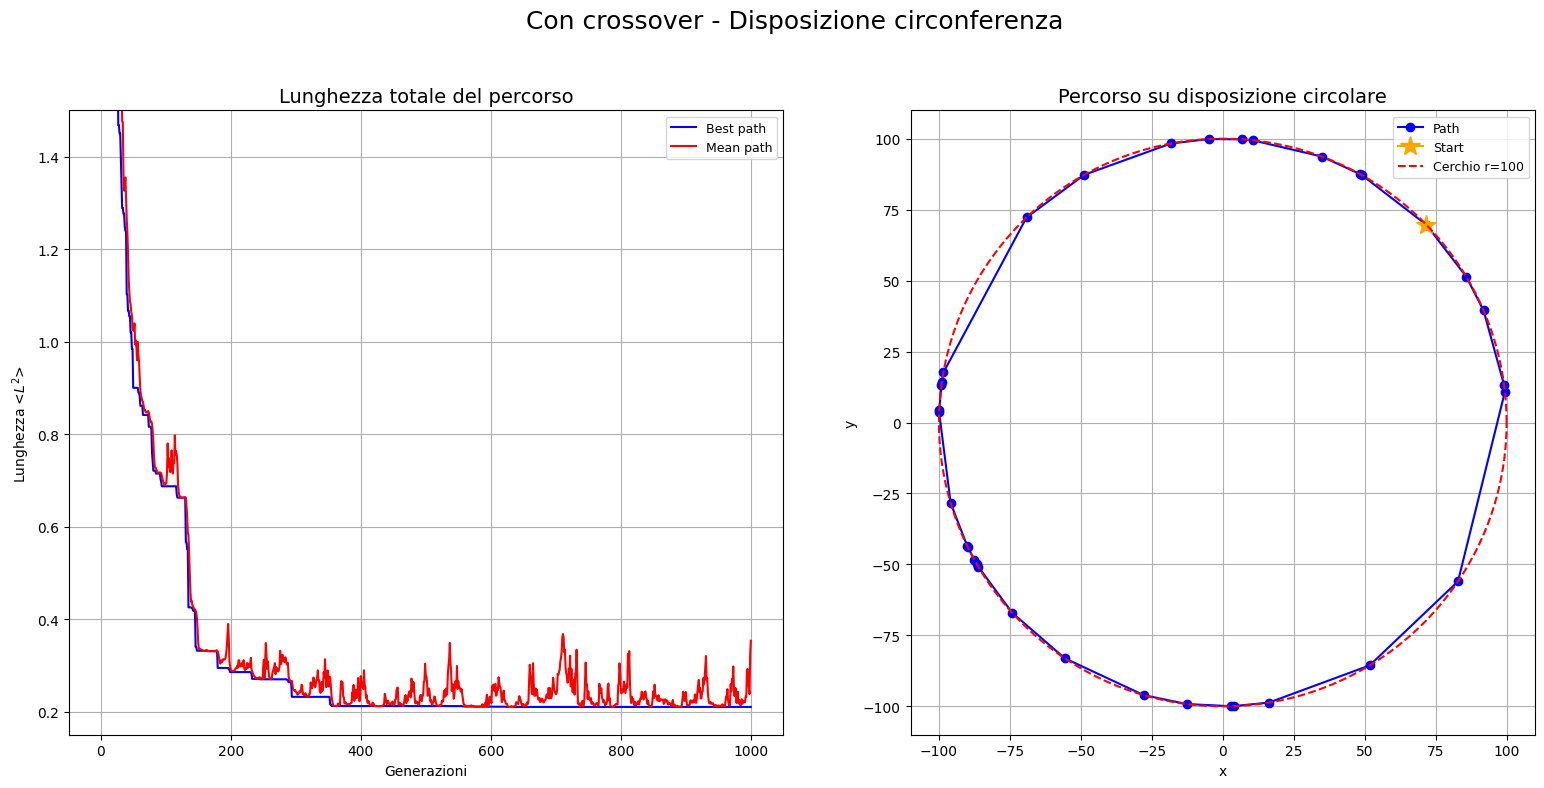

Sequenza coordinate:  

(71.75, 69.66) | (49.10, 87.12) | (48.22, 87.61) | (34.88, 93.72) | (10.56, 99.44) | (6.74, 99.77) | (-4.96, 99.88) | (-18.26, 98.32) | (-48.82, 87.28) | (-69.14, 72.25) | (-98.43, 17.63) | (-98.97, 14.33) | (-99.14, 13.07) | (-99.91, 4.25) | (-99.94, 3.61) | (-95.88, -28.42) | (-89.99, -43.62) | (-89.82, -43.96) | (-87.49, -48.43) | (-86.65, -49.92) | (-86.10, -50.86) | (-74.25, -66.98) | (-55.68, -83.07) | (-27.88, -96.03) | (-12.75, -99.18) | (2.92, -99.96) | (3.80, -99.93) | (16.29, -98.66) | (51.75, -85.57) | (82.88, -55.96) | (99.41, 10.85) | (99.12, 13.24) | (91.86, 39.51) | (85.75, 51.45) | (71.75, 69.66)

 Lunghezza del percorso migliore:  0.21009599999999998


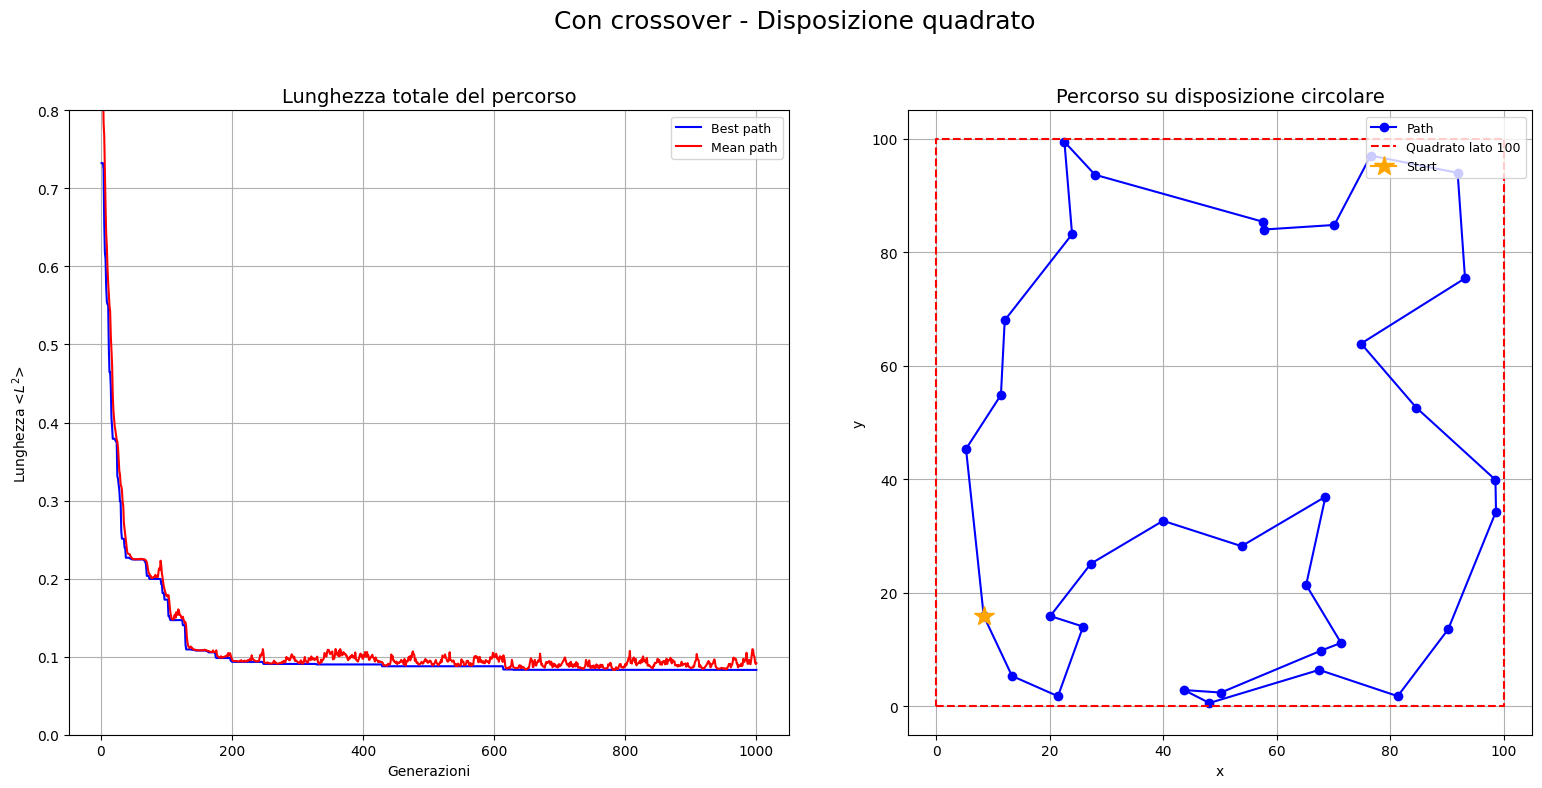

Sequenza coordinate:  

(8.40, 15.93) | (13.38, 5.35) | (21.47, 1.79) | (25.90, 14.05) | (20.12, 15.91) | (27.28, 25.14) | (39.99, 32.69) | (53.81, 28.22) | (68.60, 36.94) | (65.20, 21.39) | (71.34, 11.18) | (67.84, 9.82) | (50.19, 2.43) | (43.69, 2.87) | (48.15, 0.59) | (67.49, 6.42) | (81.33, 1.79) | (90.23, 13.59) | (98.65, 34.32) | (98.55, 39.90) | (84.58, 52.65) | (74.88, 63.91) | (93.19, 75.41) | (91.89, 93.99) | (76.58, 97.03) | (70.17, 84.81) | (57.73, 84.00) | (57.60, 85.37) | (27.99, 93.65) | (22.61, 99.46) | (23.96, 83.17) | (12.10, 68.01) | (11.43, 54.85) | (5.28, 45.35) | (8.40, 15.93)

 Lunghezza del percorso migliore:  0.0830398


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Caricamento dati
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.08_0.60_Circle", unpack=True, skiprows=1, usecols=(1, 2))
gen = np.arange(1, b_lun.size + 1)
x_path, y_path = np.loadtxt("Results/Crossover/Path_0.08_0.60_Circle", unpack=True, skiprows=1, usecols=(0, 1))

# Creazione dei subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.suptitle("Con crossover - Disposizione circonferenza", size=18)

# Primo grafico: lunghezze
ax1.set_ylim(0.15, 1.5)
#ax1.set_aspect('equal')  # scala proporzionata
ax1.plot(gen, b_lun / 100000, color='blue', label="Best path")
ax1.plot(gen, m_lun / 100000, color='red', label="Mean path")
ax1.set_title("Lunghezza totale del percorso", fontsize=14)
ax1.set_xlabel("Generazioni")
ax1.set_ylabel(r'Lunghezza <$L^2$>')
ax1.legend(loc='upper right', prop={'size': 9})
ax1.grid(True)

# Secondo grafico: percorso e circonferenza
ax2.plot(x_path, y_path, color='blue', marker='o', linestyle='-', label='Path')  # percorso ordinato
# Evidenzia il punto di partenza
ax2.plot(x_path[0], y_path[0], marker='*', color='orange', markersize=15, label='Start')

# Aggiunta della circonferenza
theta = np.linspace(0, 2 * np.pi, 500)
raggio = 100
x_circ = raggio * np.cos(theta)
y_circ = raggio * np.sin(theta)
ax2.plot(x_circ, y_circ, 'r--', label='Cerchio r=100')  # cerchio tratteggiato rosso

# Settaggi grafico percorso
ax2.set_aspect('equal')  # scala proporzionata
ax2.set_title("Percorso su disposizione circolare", fontsize=14)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.grid(True)
ax2.legend(loc='upper right', prop={'size': 9})

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("Sequenza coordinate: ", "\n")

print(" | ".join(f"({x:.2f}, {y:.2f})" for x, y in zip(x_path, y_path)))

print("\n", "Lunghezza del percorso migliore: ", b_lun[-1]/100000)



# Caricamento dati
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.08_0.60_Square", unpack=True, skiprows=1, usecols=(1, 2))
gen = np.arange(1, b_lun.size + 1)
x_path, y_path = np.loadtxt("Results/Crossover/Path_0.08_0.60_Square", unpack=True, skiprows=1, usecols=(0, 1))

# Creazione dei subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.suptitle("Con crossover - Disposizione quadrato", size=18)

# Primo grafico: lunghezze
ax1.set_ylim(0., 0.8)
#ax1.set_aspect('equal')  # scala proporzionata
ax1.plot(gen, b_lun / 100000, color='blue', label="Best path")
ax1.plot(gen, m_lun / 100000, color='red', label="Mean path")
ax1.set_title("Lunghezza totale del percorso", fontsize=14)
ax1.set_xlabel("Generazioni")
ax1.set_ylabel(r'Lunghezza <$L^2$>')
ax1.legend(loc='upper right', prop={'size': 9})
ax1.grid(True)

# Secondo grafico: percorso e quadrato
ax2.plot(x_path, y_path, color='blue', marker='o', linestyle='-', label='Path')  # percorso ordinato

x_quad = [0, 100, 100, 0, 0]
y_quad = [0, 0, 100, 100, 0]

ax2.plot(x_quad, y_quad, 'r--', label='Quadrato lato 100')  # linea rossa tratteggiata
# Evidenzia il punto di partenza
ax2.plot(x_path[0], y_path[0], marker='*', color='orange', markersize=15, label='Start')

# Settaggi grafico percorso
ax2.set_aspect('equal')  # scala proporzionata
ax2.set_title("Percorso su disposizione a quadrato", fontsize=14)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.grid(True)
ax2.legend(loc='upper right', prop={'size': 9})

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("Sequenza coordinate: ", "\n")

print(" | ".join(f"({x:.2f}, {y:.2f})" for x, y in zip(x_path, y_path)))

print("\n", "Lunghezza del percorso migliore: ", b_lun[-1]/100000)

L'introduzione del crossover ha portato a convergenza l'algoritmo. Non si osservano in questo caso tratti non ottimali, come l'incrocio nelle linee nella configurazione a quadrato che si otteneva in assenza di crossover. Il numero di generazioni richiesto in questo caso è aumentato fino a circa 625, diversamente al caso precedente dove dopo 450 generazioni non si osservava un miglioramento del percorso scelto. L'algoritmo era infatti rimasto bloccato in un minimo locale.

Per valutare il funzionamento dell'algoritmo genetico implementato, di seguito vengono riportati i risultati ottenuti variando la $P_c$ e la $P_m$ separatamente:

#### $P_c = 60 \%$ e $P_m$ variabile

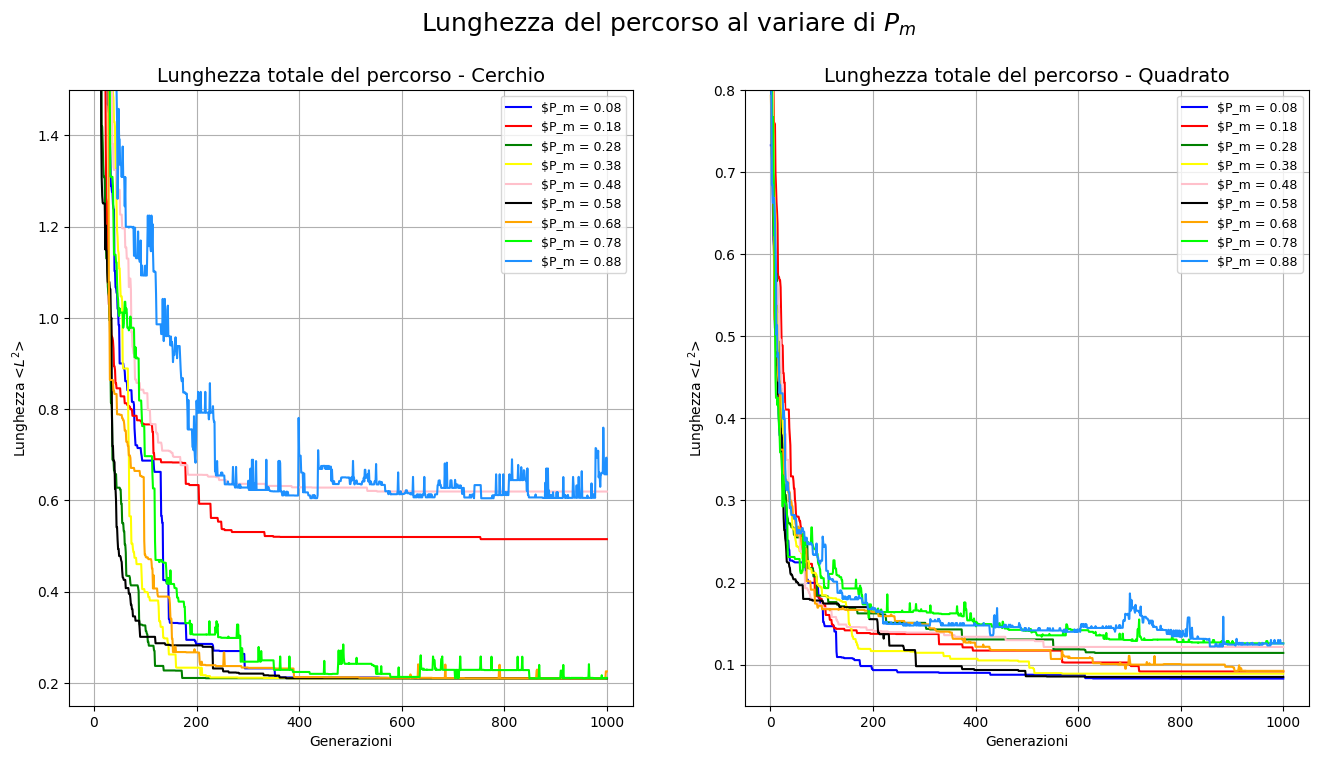

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Cerchio

# Caricamento dati
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.08_0.60_Circle", unpack=True, skiprows=1, usecols=(1, 2))
gen = np.arange(1, b_lun.size + 1)

# Creazione dei subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.suptitle(r"Lunghezza del percorso al variare di $P_m$", size=18)

# Primo grafico: lunghezze
ax1.set_ylim(0.15, 1.5)
#ax1.set_aspect('equal')  # scala proporzionata
ax1.plot(gen, b_lun / 100000, color='blue', label="$P_m = 0.08")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.18_0.60_Circle", unpack=True, skiprows=1, usecols=(1, 2))
ax1.plot(gen, b_lun / 100000, color='red', label="$P_m = 0.18")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.28_0.60_Circle", unpack=True, skiprows=1, usecols=(1, 2))
ax1.plot(gen, b_lun / 100000, color='green', label="$P_m = 0.28")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.38_0.60_Circle", unpack=True, skiprows=1, usecols=(1, 2))
ax1.plot(gen, b_lun / 100000, color='yellow', label="$P_m = 0.38")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.48_0.60_Circle", unpack=True, skiprows=1, usecols=(1, 2))
ax1.plot(gen, b_lun / 100000, color='pink', label="$P_m = 0.48")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.58_0.60_Circle", unpack=True, skiprows=1, usecols=(1, 2))
ax1.plot(gen, b_lun / 100000, color='black', label="$P_m = 0.58")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.68_0.60_Circle", unpack=True, skiprows=1, usecols=(1, 2))
ax1.plot(gen, b_lun / 100000, color='orange', label="$P_m = 0.68")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.78_0.60_Circle", unpack=True, skiprows=1, usecols=(1, 2))
ax1.plot(gen, b_lun / 100000, color='lime', label="$P_m = 0.78")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.88_0.60_Circle", unpack=True, skiprows=1, usecols=(1, 2))
ax1.plot(gen, b_lun / 100000, color='dodgerblue', label="$P_m = 0.88")


ax1.set_title("Lunghezza totale del percorso - Cerchio", fontsize=14)
ax1.set_xlabel("Generazioni")
ax1.set_ylabel(r'Lunghezza <$L^2$>')
ax1.legend(loc='upper right', prop={'size': 9})
ax1.grid(True)

#Quadrato

# Caricamento dati
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.08_0.60_Square", unpack=True, skiprows=1, usecols=(1, 2))
gen = np.arange(1, b_lun.size + 1)


# Primo grafico: lunghezze
ax2.set_ylim(0.05, 0.8)
#ax1.set_aspect('equal')  # scala proporzionata
ax2.plot(gen, b_lun / 100000, color='blue', label="$P_m = 0.08")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.18_0.60_Square", unpack=True, skiprows=1, usecols=(1, 2))
ax2.plot(gen, b_lun / 100000, color='red', label="$P_m = 0.18")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.28_0.60_Square", unpack=True, skiprows=1, usecols=(1, 2))
ax2.plot(gen, b_lun / 100000, color='green', label="$P_m = 0.28")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.38_0.60_Square", unpack=True, skiprows=1, usecols=(1, 2))
ax2.plot(gen, b_lun / 100000, color='yellow', label="$P_m = 0.38")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.48_0.60_Square", unpack=True, skiprows=1, usecols=(1, 2))
ax2.plot(gen, b_lun / 100000, color='pink', label="$P_m = 0.48")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.58_0.60_Square", unpack=True, skiprows=1, usecols=(1, 2))
ax2.plot(gen, b_lun / 100000, color='black', label="$P_m = 0.58")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.68_0.60_Square", unpack=True, skiprows=1, usecols=(1, 2))
ax2.plot(gen, b_lun / 100000, color='orange', label="$P_m = 0.68")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.78_0.60_Square", unpack=True, skiprows=1, usecols=(1, 2))
ax2.plot(gen, b_lun / 100000, color='lime', label="$P_m = 0.78")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.88_0.60_Square", unpack=True, skiprows=1, usecols=(1, 2))
ax2.plot(gen, b_lun / 100000, color='dodgerblue', label="$P_m = 0.88")
ax2.set_title("Lunghezza totale del percorso - Quadrato", fontsize=14)
ax2.set_xlabel("Generazioni")
ax2.set_ylabel(r'Lunghezza <$L^2$>')
ax2.legend(loc='upper right', prop={'size': 9})
ax2.grid(True)

Come si può osservare dai grafici, più di un valore della probabilità di mutazione risulta efficace per ottenere la convergenza dell'algoritmo. Ci sono alcuni valori che tuttavia non danno risultati, in particolare per $P_m = 18\%, 48\%, 88\%$.
Tenere una percentuale $P_m = 8\%$ porta a buoni risultati per entrambe le configurazioni. Si vuola ora variare invece il parametro $P_c$ tenendo fisso $P_m$.

#### $P_m = 8\%$ $P_c$ variabile

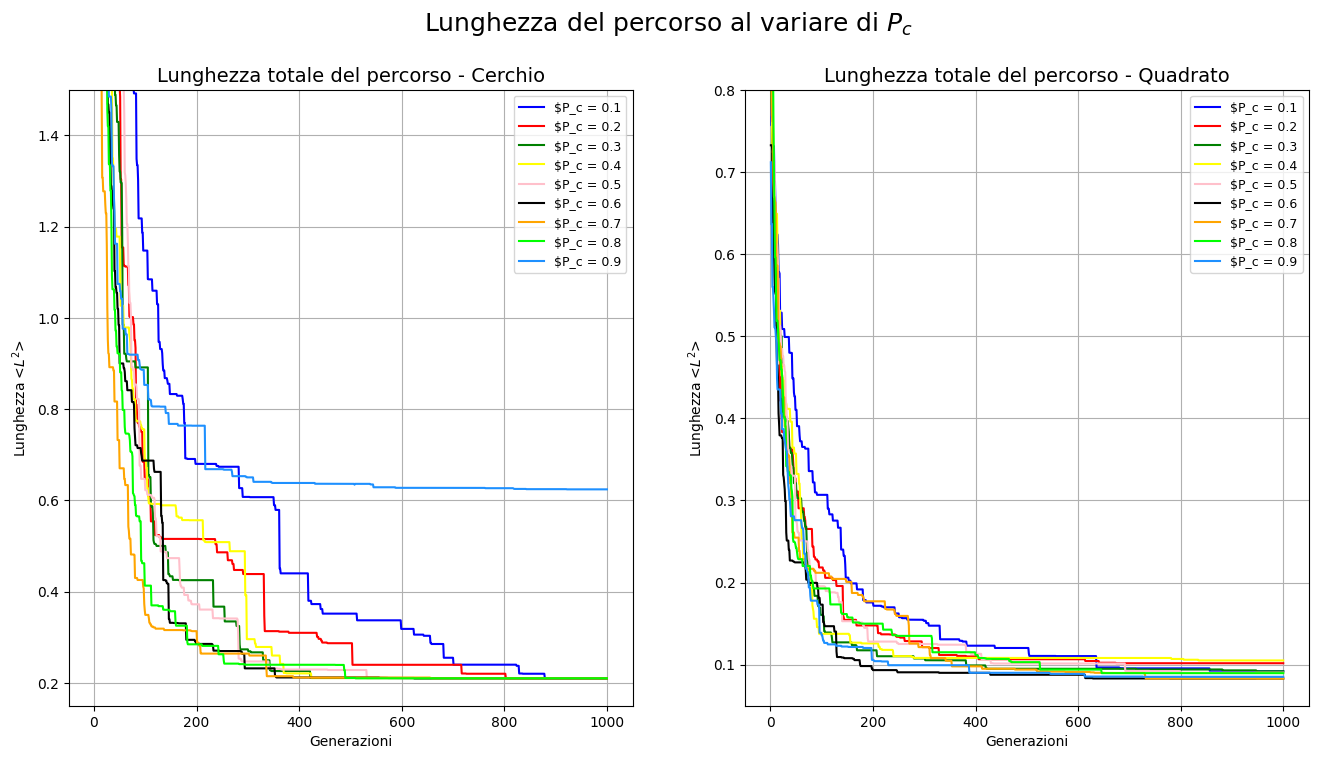

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Cerchio

# Caricamento dati
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.08_0.10_Circle", unpack=True, skiprows=1, usecols=(1, 2))
gen = np.arange(1, b_lun.size + 1)

# Creazione dei subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.suptitle(r"Lunghezza del percorso al variare di $P_c$", size=18)

# Primo grafico: lunghezze
ax1.set_ylim(0.15, 1.5)
#ax1.set_aspect('equal')  # scala proporzionata
ax1.plot(gen, b_lun / 100000, color='blue', label="$P_c = 0.1")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.08_0.20_Circle", unpack=True, skiprows=1, usecols=(1, 2))
ax1.plot(gen, b_lun / 100000, color='red', label="$P_c = 0.2")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.08_0.30_Circle", unpack=True, skiprows=1, usecols=(1, 2))
ax1.plot(gen, b_lun / 100000, color='green', label="$P_c = 0.3")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.08_0.40_Circle", unpack=True, skiprows=1, usecols=(1, 2))
ax1.plot(gen, b_lun / 100000, color='yellow', label="$P_c = 0.4")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.08_0.50_Circle", unpack=True, skiprows=1, usecols=(1, 2))
ax1.plot(gen, b_lun / 100000, color='pink', label="$P_c = 0.5")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.08_0.60_Circle", unpack=True, skiprows=1, usecols=(1, 2))
ax1.plot(gen, b_lun / 100000, color='black', label="$P_c = 0.6")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.08_0.70_Circle", unpack=True, skiprows=1, usecols=(1, 2))
ax1.plot(gen, b_lun / 100000, color='orange', label="$P_c = 0.7")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.08_0.80_Circle", unpack=True, skiprows=1, usecols=(1, 2))
ax1.plot(gen, b_lun / 100000, color='lime', label="$P_c = 0.8")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.08_0.90_Circle", unpack=True, skiprows=1, usecols=(1, 2))
ax1.plot(gen, b_lun / 100000, color='dodgerblue', label="$P_c = 0.9")


ax1.set_title("Lunghezza totale del percorso - Cerchio", fontsize=14)
ax1.set_xlabel("Generazioni")
ax1.set_ylabel(r'Lunghezza <$L^2$>')
ax1.legend(loc='upper right', prop={'size': 9})
ax1.grid(True)

#Quadrato

# Caricamento dati
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.08_0.10_Square", unpack=True, skiprows=1, usecols=(1, 2))
gen = np.arange(1, b_lun.size + 1)


# Primo grafico: lunghezze
ax2.set_ylim(0.05, 0.8)
#ax1.set_aspect('equal')  # scala proporzionata
ax2.plot(gen, b_lun / 100000, color='blue', label="$P_c = 0.1")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.08_0.20_Square", unpack=True, skiprows=1, usecols=(1, 2))
ax2.plot(gen, b_lun / 100000, color='red', label="$P_c = 0.2")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.08_0.30_Square", unpack=True, skiprows=1, usecols=(1, 2))
ax2.plot(gen, b_lun / 100000, color='green', label="$P_c = 0.3")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.08_0.40_Square", unpack=True, skiprows=1, usecols=(1, 2))
ax2.plot(gen, b_lun / 100000, color='yellow', label="$P_c = 0.4")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.08_0.50_Square", unpack=True, skiprows=1, usecols=(1, 2))
ax2.plot(gen, b_lun / 100000, color='pink', label="$P_c = 0.5")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.08_0.60_Square", unpack=True, skiprows=1, usecols=(1, 2))
ax2.plot(gen, b_lun / 100000, color='black', label="$P_c = 0.6")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.08_0.70_Square", unpack=True, skiprows=1, usecols=(1, 2))
ax2.plot(gen, b_lun / 100000, color='orange', label="$P_c = 0.7")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.08_0.80_Square", unpack=True, skiprows=1, usecols=(1, 2))
ax2.plot(gen, b_lun / 100000, color='lime', label="$P_c = 0.8")
b_lun, m_lun = np.loadtxt("Results/Crossover/Lenght_0.08_0.90_Square", unpack=True, skiprows=1, usecols=(1, 2))
ax2.plot(gen, b_lun / 100000, color='dodgerblue', label="$P_c = 0.9")
ax2.set_title("Lunghezza totale del percorso - Quadrato", fontsize=14)
ax2.set_xlabel("Generazioni")
ax2.set_ylabel(r'Lunghezza <$L^2$>')
ax2.legend(loc='upper right', prop={'size': 9})
ax2.grid(True)

In questo caso si possono fare le seguenti osservazioni:
-Percentuali troppo basse di crossover ($P_c < 30 \%$) portano comunque a convergenza verso il valore ottimale ma in tempo maggiore (convergenza lenta, maggior numero di generazioni).
-Percentuali troppo alte ($P_c > 80 \%$) portano l'algoritmo a congelarsi su un minimo locale se combinati con una bassa percentuale di stocasticità (data da $P_m$)
-Le percentuali all'interno del range appena descritto portano a convergenza l'algoritmo dopo un numero minore di generazioni.

In conclusione, i parametri settati all'inizio ($P_m = 8\%$ e $P_c = 60%$) si confermano essere una scelta ottimale.

### Animazione
Si mostra per completezza l'evoluzione del percorso scelto all'aumentare delle generazioni. In questo modo si ha un'evidenza anche visiva di come l'algoritmo vada a convergere dopo circa 400 generazioni.


In [9]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

directory = 'Results/Animation'

dir_path = Path(directory)
# 2. Trova e ordina tutti i file che iniziano con 'gen_'
file_list = sorted(
    dir_path.glob('gen_*'),
    key=lambda p: int(p.name.split('_')[1])
)
if not file_list:
    raise FileNotFoundError(f"Nessun file trovato in {directory}")

# 3. Funzione per leggere i dati di ogni generazione
#    Salta l'intestazione e restituisce un array Nx2 (x, y)
def read_generation(path):
    df = pd.read_csv(
        path,
        sep=r"\s+|,",
        engine="python",
        skiprows=1,       # salta la prima riga di intestazione
        header=None,
        names=["x", "y"]
    )
    return df.values

# 4. Carica tutte le coordinate in memoria
generations = [read_generation(f) for f in file_list]
num_generations = len(generations)

# 5. Prepara figura e assi con rapporto 1:1
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal', 'box')

# 6. Disegna la cornice: cerchio di raggio 100 centrato in (0, 0)
circle = plt.Circle((0, 0), 100,
                   edgecolor='r', linestyle='--', fill=False)
ax.add_patch(circle)

# 7. Setta il percorso e il testo della generazione
line, = ax.plot([], [], '-o', lw=2)
text_gen = ax.text(0.02, 0.95, '', transform=ax.transAxes)

# 8. Limiti fissi per visualizzare tutto il cerchio
ax.set_xlim(-105, 105)
ax.set_ylim(-105, 105)
ax.set_title('Evoluzione percorso TSP')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# 9. Colormap
cmap = plt.get_cmap('viridis', num_generations)

# 10. Funzione di inizializzazione
def init():
    line.set_data([], [])
    text_gen.set_text('')
    return line, text_gen

# 11. Funzione di aggiornamento per ogni frame
def update(i):
    coords = generations[i]
    xs = np.append(coords[:, 0], coords[0, 0])
    ys = np.append(coords[:, 1], coords[0, 1])
    line.set_data(xs, ys)
    line.set_color(cmap(i))
    text_gen.set_text(f'Generazione: {1+i*10}/{591}')
    return line, text_gen

# 12. Creazione dell'animazione
anim = FuncAnimation(
    fig, update,
    frames=num_generations,
    init_func=init,
    blit=True,
    interval=200
)

# 13. Mostra l'animazione inline e chiudi la figura finale
display(HTML(anim.to_jshtml()))
plt.close(fig)
